In [17]:
import h5py
import numpy as np
import arviz as az
import matplotlib.pyplot as plt


In [18]:
sample_paths = [
    '/home/anne/Masterarbeit/masterarbeit/results/samples1_l0.h5',
    '/home/anne/Masterarbeit/masterarbeit/results/samples1_l1.h5',
    '/home/anne/Masterarbeit/masterarbeit/results/samples1_l2.h5'
]

samples = []

for i in range(len(sample_paths)):
    fin = h5py.File(sample_paths[i])
    samples.append(np.array( fin['/samples'] ))
    fin.close()

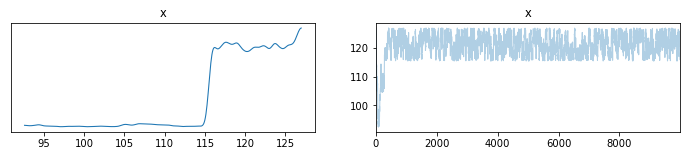

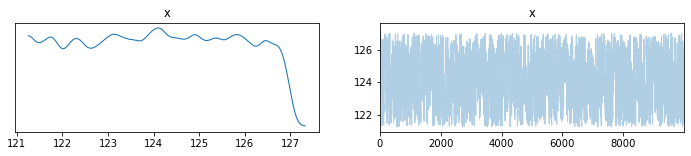

In [19]:
for i in range(len(sample_paths)):
    s = samples[i]
    az.plot_trace(s[0,:])

array([[<AxesSubplot:title={'center':'x'}>]], dtype=object)

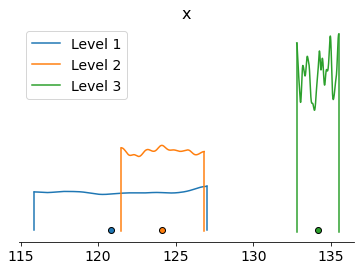

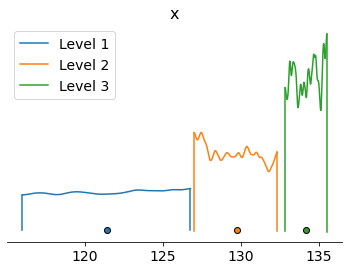

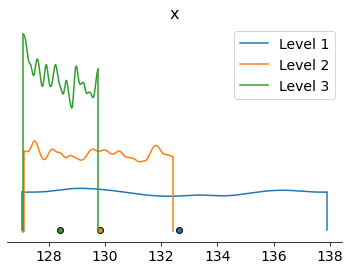

In [ ]:
s0 = []
s1 = []
s2 = []

data_labels = ["Level 1", "Level 2", "Level 3"]

for i in range(len(sample_paths)):
    s0.append(samples[i][0,:])
    s1.append(samples[i][1,:])
    s2.append(samples[i][2,:])

az.plot_density(s0, data_labels=data_labels)
az.plot_density(s1, data_labels=data_labels)
az.plot_density(s2, data_labels=data_labels)

In [ ]:
num = len(samples[0])
point = np.array([110,120,130])

for i in range(len(sample_paths)):
    print("Level " + str(i) + ":")
    mean = np.mean(samples[i], axis=1)
    var = np.var(samples[i], axis=1)
    print("Mean = " + str(mean))
    print("Variance = " + str(var))
    print("DLE = "+ str(np.linalg.norm(mean-point)))
    print("\n")

Level 0:
Mean = [120.84983108 121.44171913 132.64073769]
Variance = [19.27897367 11.84426528 12.05645189]
DLE = 11.259257710015262


Level 1:
Mean = [124.11530186 129.7351566  129.82963275]
Variance = [2.67230998 2.78428889 2.71147049]
DLE = 17.147712552426547


Level 2:
Mean = [134.13427494 134.19265066 128.39501402]
Variance = [1.23183139 0.87240911 0.69507442]
DLE = 28.044082081822648




(array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
        10000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.]),
 array([ 35.   ,  37.875,  40.75 ,  43.625,  46.5  ,  49.375,  52.25 ,
         55.125,  58.   ,  60.875,  63.75 ,  66.625,  69.5  ,  72.375,
         75.25 ,  78.125,  81.   ,  83.875,  86.75 ,  89.625,  92.5  ,
         95.375,  98.25 , 101.125, 104.   , 106.875, 109.75 , 112.625,
        115.5  , 118.375, 121.25 , 124.125, 127.   , 129.875, 132.75 ,
        135.625, 138.5  , 141.375, 144.25 , 147.125, 150.   , 152.8

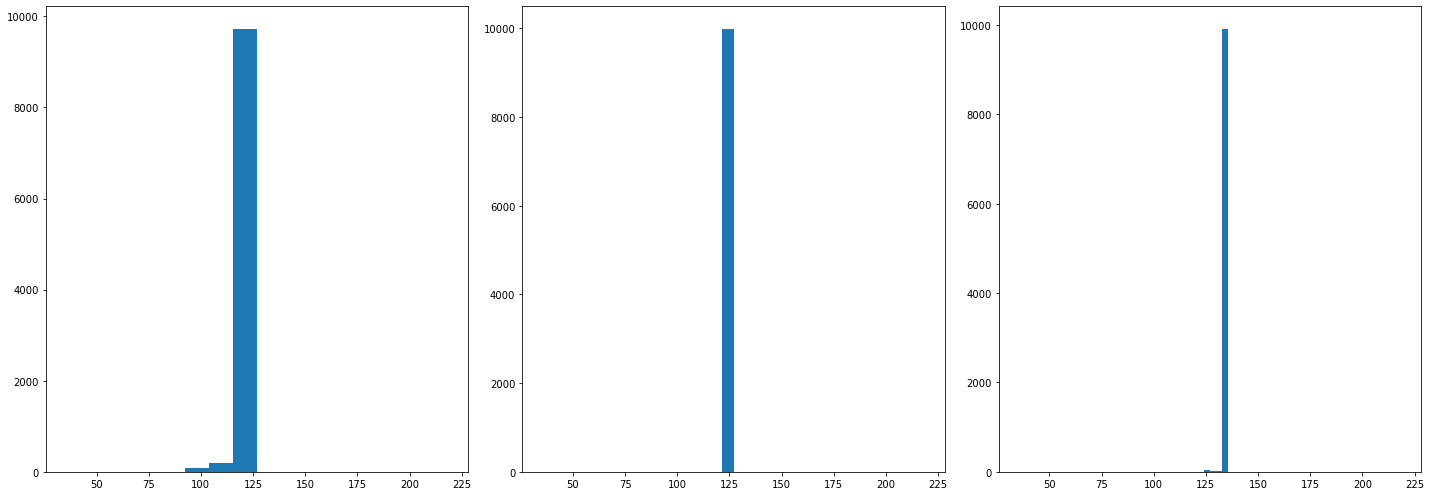

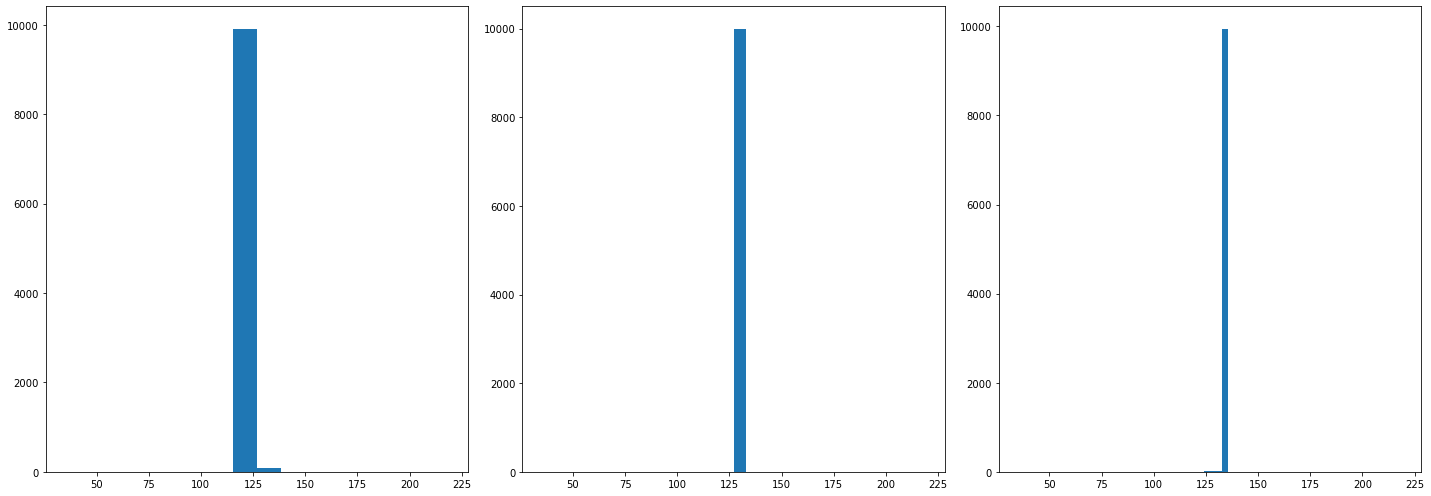

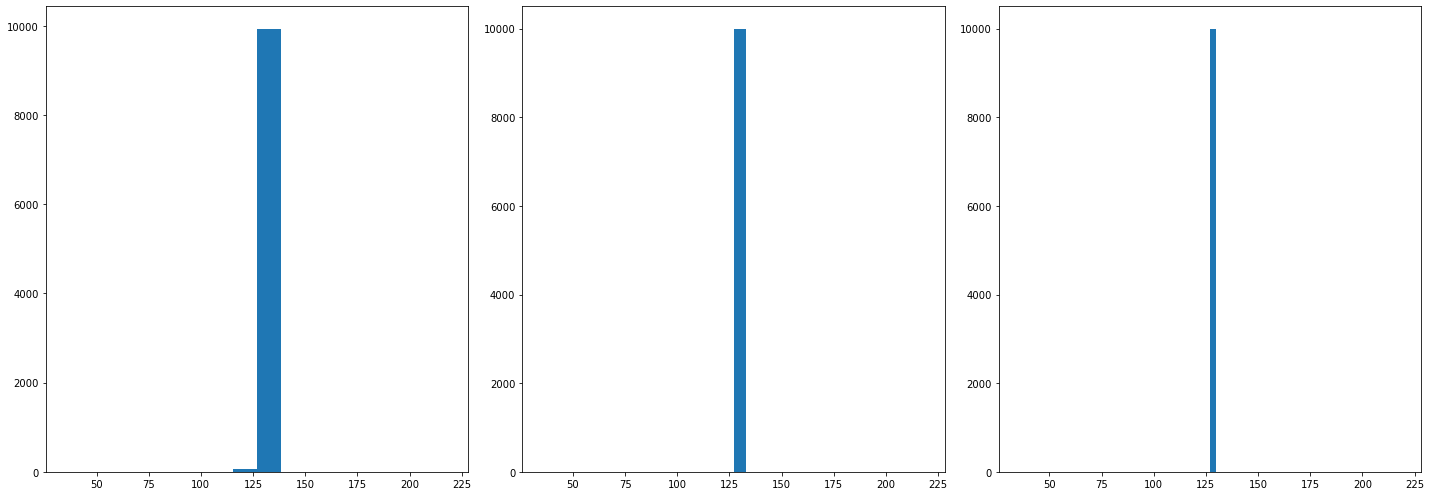

In [14]:
fig, axs = plt.subplots(1, 3,
                        figsize =(20, 7),
                        tight_layout = True)
 
axs[0].hist(samples[0][0,:], bins = 16, range = [35,219])
axs[1].hist(samples[1][0,:], bins = 32, range = [35,219])
axs[2].hist(samples[2][0,:], bins = 64, range = [35,219])

fig, axs = plt.subplots(1, 3,
                        figsize =(20, 7),
                        tight_layout = True)
 
axs[0].hist(samples[0][1,:], bins = 16, range = [35,219])
axs[1].hist(samples[1][1,:], bins = 32, range = [35,219])
axs[2].hist(samples[2][1,:], bins = 64, range = [35,219])

fig, axs = plt.subplots(1, 3,
                        figsize =(20, 7),
                        tight_layout = True)
 
axs[0].hist(samples[0][2,:], bins = 16, range = [35,219])
axs[1].hist(samples[1][2,:], bins = 32, range = [35,219])
axs[2].hist(samples[2][2,:], bins = 64, range = [35,219])

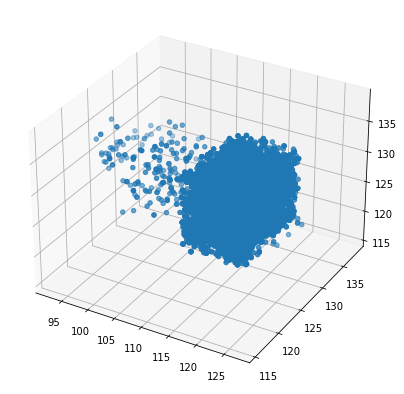

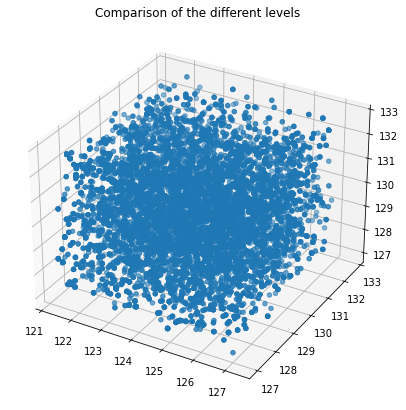

In [15]:
for i in range(len(sample_paths)-1):
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes(projection ="3d")
    ax.scatter3D(samples[i][0,:], samples[i][1,:], samples[i][2,:])

plt.title("Comparison of the different levels")

plt.show()

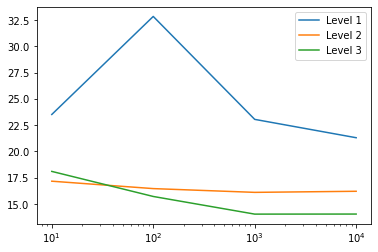

In [16]:
nums = [10, 100, 1000, 10000]
point = np.array([132, 137, 142])

for i in range(len(sample_paths)):
    errors = []
    
    for num in nums:
        mean = np.mean(samples[i][:,0:num], axis=1)
        errors.append(np.linalg.norm(mean-point))
    
    plt.plot(nums, errors, label='Level '+str(i+1))

plt.xscale("log")
plt.legend()
plt.show()